In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
spam_df=pd.read_excel("/content/emails.xlsx")
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5721,Subject: re : research and development charges...,0
5722,"Subject: re : receipts from visit jim , than...",0
5723,Subject: re : enron case study update wow ! a...,0
5724,"Subject: re : interest david , please , call...",0


In [10]:
non_spam=spam_df[spam_df['spam']==0]

In [11]:
spam=spam_df[spam_df['spam']==1]

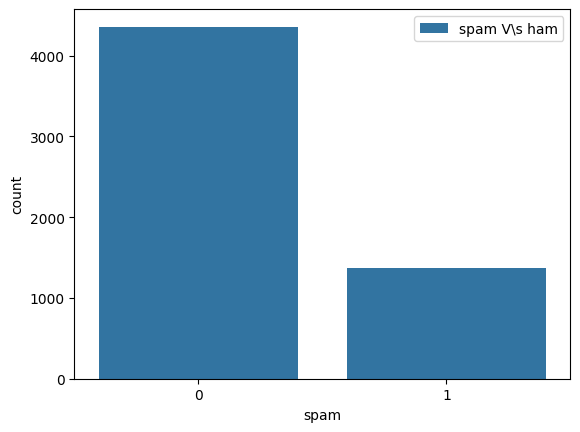

In [12]:
plot=sns.countplot(x='spam',data=spam_df,label="spam V\s ham")

In [ ]:
#apply countvectorizer that is convert the text into number
#not considering deletion of stop words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


In [14]:
vectorizer=CountVectorizer()
vectorised_data=vectorizer.fit_transform(spam_df['text'])

In [15]:
vectorised_data

<5726x37190 sparse matrix of type '<class 'numpy.int64'>'
	with 705936 stored elements in Compressed Sparse Row format>

In [20]:
print(vectorizer.get_feature_names_out()[1000:14000])

['218' '2181' '218135092134' ... 'exoc' 'exoctic' 'exorbitant']


In [21]:
X=vectorised_data
y=spam_df['spam']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [28]:
y_predict=NB_classifier.predict(X_test)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_predict,y_test)

0.97669133192389

In [31]:
#testing the model

In [41]:
email_data=['Hey Pratik can we go for a football match tomorrow at 7:30 PM IST',
        'upto 20% discount on latest styles,exclusive offer only available for few hours',
         'Get annual cashback upto INR 10000 with standard chatered smart credit card']


In [42]:
emails_vectorised=vectorizer.transform(email_data)

In [43]:
NB_classifier.predict(emails_vectorised)

array([0, 1, 1])